In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

In [2]:
dir_name='.'

# Load data

## Read sentence for each ALIGNED article csv file with train set and test set.

In [2]:
df_train_transcript = pd.read_csv('{}/CORPUS/HANJA/HANJA_TRAIN_ALL.csv'.format(dir_name))
df_train_transcript = df_train_transcript.to_dict(orient='dict')

TRAIN_KSENT = (list(df_train_transcript['KO'].values()))
TRAIN_KSENT.remove('\"')

TRAIN_ZSENT = (list(df_train_transcript['ZH'].values()))
TRAIN_ZSENT.remove('”')

TRAIN_HSENT = (list(df_train_transcript['HANJA_Z'].values()))
TRAIN_HSENT.remove('\"')

#TRAIN_HSENT = (list(df_train_transcript['HANJA_K'].values()))
#TRAIN_HSENT.remove('\"')

print(len(TRAIN_KSENT))
df_train_transcript = []

146660


In [3]:
df_test_transcript = pd.read_csv('{}/CORPUS/HANJA/HANJA_TEST_ALL.csv'.format(dir_name))
df_test_transcript = df_test_transcript.to_dict(orient='dict')

TEST_KSENT = (list(df_test_transcript['KO'].values()))
TEST_ZSENT = (list(df_test_transcript['ZH'].values()))
TEST_HSENT = (list(df_test_transcript['HANJA_Z'].values()))
#TEST_HSENT = (list(df_test_transcript['HANJA_K'].values()))

df_test_transcript = []
print(len(TEST_KSENT))

36089


In [4]:
df_train_zhuyin = pd.read_csv('{}/CORPUS/ZHUYIN/ZHUYIN_TRAIN_ALL.csv'.format(dir_name))
df_train_zhuyin = df_train_zhuyin.to_dict(orient='dict')

TRAIN_ZYSENT = (list(df_train_zhuyin['zhuyin'].values()))
TRAIN_ZYSENT.remove(np.nan)
TRAIN_ZYSENT = [sent.replace('\n','') for sent in TRAIN_ZYSENT]

df_train_zhuyin = []
print(len(TRAIN_ZYSENT))

146660


In [5]:
df_test_zhuyin = pd.read_csv('{}/CORPUS/ZHUYIN/ZHUYIN_TEST_ALL.csv'.format(dir_name))
df_test_zhuyin = df_test_zhuyin.to_dict(orient='dict')

TEST_ZYSENT = [sent.replace('\n','') for sent in (list(df_test_zhuyin['zhuyin'].values()))]

df_test_transcript = []
print(len(TEST_ZYSENT))

36089


In [7]:
print(TRAIN_ZYSENT[0])
print(TEST_ZYSENT[0])

ㄒㄧㄝˋㄒㄧㄝˋㄉㄚˋㄐㄧㄚ。
ㄨㄛˇㄒㄧㄤㄒㄧㄣˋㄖㄨˊㄍㄨㄛˇㄋㄧˇㄍㄟˇㄊㄚㄇㄣ˙ㄓㄥˋㄑㄩㄝˋㄉㄜ˙ㄈㄤㄈㄚˇㄏㄜˊㄍㄨㄥㄐㄩˋ，ㄊㄚㄇㄣ˙ㄎㄜˇㄧˇㄅㄚˇㄕㄢㄉㄡㄓㄨㄢˇㄧˊㄌㄜ˙ㄒㄧㄝˋㄒㄧㄝˋ（ㄍㄨˇㄓㄤˇㄕㄥ）


## TED2020 Dataset

In [3]:
df_train_transcript = pd.read_csv('{}/CORPUS/ted2020/TED2020_HANJA_TRAIN_ALL.csv'.format(dir_name))
df_train_transcript = df_train_transcript.to_dict(orient='dict')

TRAIN_KSENT = (list(df_train_transcript['KO'].values()))

TRAIN_ZSENT = (list(df_train_transcript['ZH'].values()))

TRAIN_HSENT = (list(df_train_transcript['HANJA_Z'].values()))

print(len(TRAIN_KSENT))
df_train_transcript = []

311376


In [4]:
df_test_transcript = pd.read_csv('{}/CORPUS/ted2020/TED2020_HANJA_TEST_ALL.csv'.format(dir_name))
df_test_transcript = df_test_transcript.to_dict(orient='dict')

TEST_KSENT = (list(df_test_transcript['KO'].values()))
TEST_ZSENT = (list(df_test_transcript['ZH'].values()))
TEST_HSENT = (list(df_test_transcript['HANJA_Z'].values()))
#TEST_HSENT = (list(df_test_transcript['HANJA_K'].values()))

df_test_transcript = []
print(len(TEST_KSENT))

77844


In [5]:
df_train_zhuyin = pd.read_csv('{}/CORPUS/ted2020/TED2020_TRAIN_ALL_ZHUYIN.csv'.format(dir_name))
df_train_zhuyin = df_train_zhuyin.to_dict(orient='dict')

TRAIN_ZYSENT = (list(df_train_zhuyin['zhuyin'].values()))

TRAIN_ZYSENT = [str(sent).replace('\n','') for sent in TRAIN_ZYSENT]

df_train_zhuyin = []
print(len(TRAIN_ZYSENT))

311376


In [6]:
df_test_zhuyin = pd.read_csv('{}/CORPUS/ted2020/TED2020_TEST_ALL_ZHUYIN.csv'.format(dir_name))
df_test_zhuyin = df_test_zhuyin.to_dict(orient='dict')

TEST_ZYSENT = [str(sent).replace('\n','') for sent in (list(df_test_zhuyin['zhuyin'].values()))]

df_test_transcript = []
print(len(TEST_ZYSENT))

77844


# Pretrain Model

In [7]:
import torch
from transformers import BertTokenizer, BertModel, BertConfig, BertForPreTraining, AutoModel, BertTokenizerFast
from torch.utils.data import Dataset, DataLoader
from transformers import BertConfig, BertForMaskedLM
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time

## Set parameters

In [12]:
# 設定訓練參數
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
max_length = 32
batch_size = 16
#batch_size = 32
learning_rate = 1e-4
num_epochs = 10

In [13]:
print(device)

cuda


## Load Tokenizer

In [11]:
import transformers
transformers.logging.set_verbosity_error() # solve the warning: 'Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.'

### Chinese Tokenizer

In [14]:
#zh_tokenizer = BertTokenizer.from_pretrained('{}/MODELS/TOKENIZER/new_zh_tokenizer_add_bpmf_korean_tokens_v2'.format(dir_name)) # load bert-base-chinese tokenizer with bpmf、hangul tokens(from 'kykim/bert-kor-base' and konlpy)
zh_tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')

In [15]:
# zhuyin tokens
import re
zhuyins = ['ㄅ','ㄆ','ㄇ','ㄈ','ㄉ','ㄊ','ㄋ','ㄌ','ㄍ','ㄎ','ㄏ','ㄐ','ㄑ','ㄒ','ㄓ','ㄔ','ㄕ','ㄖ','ㄗ','ㄘ','ㄙ','ㄧ','ㄨ','ㄩ','ㄚ','ㄛ','ㄜ','ㄝ','ㄞ','ㄟ','ㄠ','ㄡ','ㄢ','ㄣ','ㄤ','ㄥ','ㄦ','ˇ','ˋ','ˊ','˙']

def check_bpmf_is_not(text):
    test_list = ['.*[ㄅㄆㄇㄈㄉㄊㄋㄌㄍㄎㄏㄐㄑㄒㄓㄔㄕㄖㄗㄘㄙㄧㄨㄩㄚㄛㄜㄝㄞㄟㄠㄡㄢㄣㄤㄥㄦˇˋˊ˙]+.*']
    for t in test_list:
        valid = re.compile(t)
        try:
            if(valid.match(text) != None):
                return True
        except:
            return False
    return False

zhuyin_df = pd.read_csv('{}/CORPUS/TOKEN/zhuyin_tokens_count.csv'.format(dir_name))
zhuyin_df = zhuyin_df.to_dict(orient='dict')
zhuyin_tokens = list(zhuyin_df['zhuyin'].values())
print(len(zhuyin_tokens))

for tok in zhuyin_tokens:
  if(check_bpmf_is_not(tok)):
    continue
  else:
    zhuyin_tokens.remove(tok)
print('zy:',len(zhuyins))
print('zy tokens:',len(zhuyin_tokens))

2751
zy: 41
zy tokens: 2089


In [16]:
# korean tokens
ko_tokenizer = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")
ko_tokenizer_tokens = list(ko_tokenizer.get_vocab().keys())
print(len(ko_tokenizer_tokens))

42000


In [17]:
# add new tokens
zh_tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
print('Original Length: ',len(zh_tokenizer))

zh_tokenizer.add_tokens(zhuyins)
print('Add zhuyins: ',len(zh_tokenizer))

zh_tokenizer.add_tokens(zhuyin_tokens)
print('Add zhuyin tokens: ',len(zh_tokenizer))

zh_tokenizer.add_tokens(ko_tokenizer_tokens)
print('Add korean tokens from kykim/bert-kor-base tokenizer: ',len(zh_tokenizer))

Original Length:  21128
Add zhuyins:  21146
Add zhuyin tokens:  22839
Add korean tokens from kykim/bert-kor-base tokenizer:  63662


In [18]:
zh_bert_model = AutoModel.from_pretrained('ckiplab/bert-base-chinese')
zh_bert_model.resize_token_embeddings(len(zh_tokenizer))

Embedding(63662, 768)

### Korean Tokenizer

In [ ]:
ko_tokenizer = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")

tokenizer_config.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/344k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

In [ ]:
ko_bert_model = BertModel.from_pretrained("kykim/bert-kor-base")

### mbert

In [ ]:
mbert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
mbert_model = BertModel.from_pretrained('bert-base-multilingual-cased').to(device)


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

### chinese bert with phonetic

In [21]:
my_model = zh_bert_model
my_model.to(device)

my_tokenizer = zh_tokenizer
tgt_tokenizer = zh_tokenizer
model_name = 'TED_ZK10_zh_no_hanja_with_zy'

### Get Embeddings

In [ ]:
# 输入文本
text = TEST_HSENT[923]
print(text)
# 使用 mBERT 分词器对文本进行编码
inputs = mbert_tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)

# 将输入传递给 mBERT 模型以获取输出
with torch.no_grad():
    outputs = mbert_model(**inputs)

# 提取嵌入
embeddings = outputs.last_hidden_state

print(embeddings)

그러다 結局에는 그냥 屈伏下故 末乃 버리綿 적어도 多飮에는 아무 日 없을 거라고 生角하는 持經까지 이르렀습니다. 패배자可 된 느낌이었죠.
tensor([[[-1.2058e-01, -1.4019e-01, -7.5852e-01,  ...,  5.7960e-01,
           1.4735e-01,  5.7352e-02],
         [-6.1292e-01, -7.4539e-01, -8.3502e-02,  ...,  9.6286e-01,
           3.0688e-01,  2.5471e-02],
         [-4.5489e-01, -6.0978e-01, -3.0158e-01,  ...,  1.0734e+00,
           2.0139e-01,  4.8326e-02],
         ...,
         [ 2.7903e-03, -8.0216e-02, -1.0318e+00,  ...,  5.6032e-01,
          -8.0176e-04,  3.7377e-01],
         [-1.9213e-01, -3.8575e-01, -6.5699e-01,  ...,  7.4177e-01,
          -1.2330e-01,  3.6022e-01],
         [-3.7075e-01, -2.1907e-01, -5.3335e-01,  ...,  7.2308e-01,
           2.5642e-01,  7.5225e-02]]])


In [22]:
# 输入文本
text = TEST_HSENT[923]
print(text)
# 使用 mBERT 分词器对文本进行编码
inputs = zh_tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)

# 将输入传递给 mBERT 模型以获取输出
with torch.no_grad():
    outputs = my_model(**inputs)

# 提取嵌入
embeddings = outputs.last_hidden_state

print(embeddings)

1994년도義 南 아프리카 共和國義 民主酒蟻路疑 變幻殷 牛李에게 말그대로, 꿈의 實現 이었습니다. 
tensor([[[ 0.4660, -0.0606, -0.5926,  ..., -0.1138,  0.3049,  0.1375],
         [ 0.1826,  0.0365, -0.4388,  ...,  0.2330,  1.2750, -0.3760],
         [ 0.1941, -0.4593, -0.8900,  ...,  0.8699,  0.6561, -0.0322],
         ...,
         [ 0.9102, -0.5670, -1.1294,  ...,  0.4786,  0.7526, -0.0664],
         [ 0.5446, -0.3383, -0.4223,  ...,  0.1287,  0.4730, -0.0287],
         [ 0.4660, -0.0606, -0.5926,  ..., -0.1137,  0.3049,  0.1375]]],
       device='cuda:0')


In [ ]:
# 输入文本
print(TEST_ZSENT[923])
text = TEST_ZYSENT[923]
print(text)
# 使用 mBERT 分词器对文本进行编码
inputs = mbert_tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)
print(inputs['input_ids'])
print(mbert_tokenizer.decode(inputs['input_ids'][0], skip_special_tokens=True))
# 将输入传递给 mBERT 模型以获取输出
with torch.no_grad():
    outputs = mbert_model(**inputs)

# 提取嵌入
embeddings = outputs.last_hidden_state

print(embeddings)

到最後我覺得，乾脆屈服熬過去，至少到下次再發生前我能得到點平靜。
ㄉㄠˋㄗㄨㄟˋㄏㄡˋㄨㄛˇㄐㄩㄝˊㄉㄜ˙，ㄍㄢㄘㄨㄟˋㄑㄩㄈㄨˊㄠˊㄍㄨㄛˋㄑㄩˋ，ㄓˋㄕㄠˇㄉㄠˋㄒㄧㄚˋㄘˋㄗㄞˋㄈㄚㄕㄥㄑㄧㄢˊㄨㄛˇㄋㄥˊㄉㄜ˙ㄉㄠˋㄉㄧㄢˇㄆㄧㄥˊㄐㄧㄥˋ。
tensor([[  101,   100, 10064,   100, 10064,   100,  1882,   102]])
， ， 。
tensor([[[ 0.1761,  0.2477,  0.2021,  ...,  0.0559,  0.0265,  0.0520],
         [-0.2596,  0.5538,  0.7481,  ...,  0.4942, -0.0487, -0.1889],
         [ 0.2373,  0.3286,  0.1775,  ...,  0.1499,  0.3106,  0.0685],
         ...,
         [-0.2755,  0.5195,  0.7319,  ...,  0.3360,  0.0062, -0.1785],
         [ 0.2210,  0.2828,  0.6919,  ...,  0.0976, -0.0144, -0.0212],
         [ 0.2256,  0.3239,  0.7765,  ...,  0.0071, -0.1020,  0.0957]]])


In [ ]:
# 输入文本
print(TEST_ZSENT[923])
text = TEST_ZYSENT[923]
print(text)
# 使用 mBERT 分词器对文本进行编码
inputs = zh_tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)
print(inputs['input_ids'])
print(zh_tokenizer.decode(inputs['input_ids'][0], skip_special_tokens=True))

# 将输入传递给 mBERT 模型以获取输出
with torch.no_grad():
    outputs = zh_bert_model(**inputs)

# 提取嵌入
embeddings = outputs.last_hidden_state

print(embeddings)

到最後我覺得，乾脆屈服熬過去，至少到下次再發生前我能得到點平靜。
ㄉㄠˋㄗㄨㄟˋㄏㄡˋㄨㄛˇㄐㄩㄝˊㄉㄜ˙，ㄍㄢㄘㄨㄟˋㄑㄩㄈㄨˊㄠˊㄍㄨㄛˋㄑㄩˋ，ㄓˋㄕㄠˇㄉㄠˋㄒㄧㄚˋㄘˋㄗㄞˋㄈㄚㄕㄥㄑㄧㄢˊㄨㄛˇㄋㄥˊㄉㄜ˙ㄉㄠˋㄉㄧㄢˇㄆㄧㄥˊㄐㄧㄥˋ。
tensor([[  101, 21212, 21314, 21222, 21160, 21298, 21178,  8024, 21847, 21669,
         21683, 21566, 22097, 21245, 21282,  8024, 21248, 21326, 21212, 21250,
         21176, 21159, 21463, 21158, 21164, 21160, 21293, 21178, 21212, 21330,
         21347, 21360,   511,   102]])
ㄉㄠˋ ㄗㄨㄟˋ ㄏㄡˋ ㄨㄛˇ ㄐㄩㄝˊ ㄉㄜ˙ ， ㄍㄢ ㄘㄨㄟˋ ㄑㄩ ㄈㄨˊ ㄠˊ ㄍㄨㄛˋ ㄑㄩˋ ， ㄓˋ ㄕㄠˇ ㄉㄠˋ ㄒㄧㄚˋ ㄘˋ ㄗㄞˋ ㄈㄚ ㄕㄥ ㄑㄧㄢˊ ㄨㄛˇ ㄋㄥˊ ㄉㄜ˙ ㄉㄠˋ ㄉㄧㄢˇ ㄆㄧㄥˊ ㄐㄧㄥˋ 。
tensor([[[ 0.6617,  0.2457, -0.6361,  ...,  0.2902,  0.2320,  0.1926],
         [ 0.3693,  0.5146, -0.7370,  ...,  0.6889,  0.4915, -0.1615],
         [ 0.4452,  0.5069, -0.7422,  ...,  1.1378,  0.6939, -0.3189],
         ...,
         [ 0.4446,  0.6380, -0.8634,  ...,  1.3567,  0.5245, -0.6709],
         [ 0.2261,  0.4231,  0.6838,  ...,  0.9226, -0.1988,  0.3022],
         [ 0.6617,  0.2457, -0.6361,  ...,  0.2902,  0.2320,  0.1926]]])


### Build Dataset Function

In [23]:
# 假設您有一個平行語料庫，這是您的資料集
class TranslationDataset(Dataset):
    def __init__(self, source_sentences, target_sentences, bpmf_sentences):
        self.source_sentences = source_sentences
        self.target_sentences = target_sentences
        self.bpmf_sentences = bpmf_sentences
        #self.hanja_sentences = hanja_sentences
        self.length = len(source_sentences)

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        source = self.source_sentences[index]
        target = self.target_sentences[index]
        bpmf = self.bpmf_sentences[index]
        #hanja = self.hanja_sentences[index]    
        
        source_token = my_tokenizer(source, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length)
        target_token = tgt_tokenizer(target, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length)        
        #hanja_token = my_tokenizer(hanja, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length)
        bpmf_token = my_tokenizer(bpmf, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length)




        return source, target, bpmf, source_token, target_token, bpmf_token


### Build Model

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
'''# 建立模型
class TranslationModel(nn.Module):
    global my_tokenizer
    def __init__(self, bert_model):
        super(TranslationModel, self).__init__()
        self.bert1 = bert_model
        #self.bert2 = bert_model
        self.bert3 = bert_model
        self.linear = nn.Linear(self.bert1.config.hidden_size, my_tokenizer.vocab_size)

    def forward(self, input_ids, hanja_ids, attention_mask, hanja_attention_mask):#, bpmf_ids, bpmf_attention_mask):
        zh_outputs = self.bert1(input_ids=input_ids, attention_mask=attention_mask)
        #bpmf_outputs = self.bert2(input_ids=bpmf_ids, attention_mask=bpmf_attention_mask)
        hanja_outputs = self.bert3(input_ids=hanja_ids, attention_mask=hanja_attention_mask)
        prediction_scores = self.linear(0.5*zh_outputs.last_hidden_state+ 0.5*hanja_outputs.last_hidden_state)# +  0.5*bpmf_outputs.last_hidden_state
        return prediction_scores
'''

In [25]:


class TranslationModel(nn.Module):
    def __init__(self, bert_model, dropout_prob=0.1):
        super(TranslationModel, self).__init__()
        self.bert1 = bert_model
        self.bert2 = bert_model
        self.dropout1 = nn.Dropout(dropout_prob)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.linear = nn.Linear(self.bert1.config.hidden_size, len(tgt_tokenizer))

    def forward(self, input_ids, attention_mask, bpmf_ids, bpmf_attention_mask):
        zh_outputs = self.bert1(input_ids=input_ids, attention_mask=attention_mask)
        bpmf_outputs = self.bert2(input_ids=bpmf_ids, attention_mask=bpmf_attention_mask)

        # Apply dropout
        zh_outputs = self.dropout1(zh_outputs.last_hidden_state)
        bpmf_outputs = self.dropout2(bpmf_outputs.last_hidden_state)

        # Combine representations
        combined_outputs = 0.5 * zh_outputs + 0.5 * bpmf_outputs

        prediction_scores = self.linear(combined_outputs)
        return prediction_scores


### Data Loader

In [26]:
# 載入資料集
train_source_sentences = TRAIN_ZSENT  # 中文句子
train_target_sentences = TRAIN_KSENT  # 韓文句子
dataset = TranslationDataset(train_source_sentences, train_target_sentences, TRAIN_ZYSENT)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [27]:
test_source_sentences = TEST_ZSENT  # 中文句子
test_target_sentences = TEST_KSENT  # 韓文句子
test_dataset = TranslationDataset(test_source_sentences, test_target_sentences, TEST_ZYSENT)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [28]:
start = time.time()
for batch in dataloader:
  try:
        source, target, bpmf, source_token, target_token, bpmf_token = batch
  except:
        print(batch)
        break
end = time.time()
print(int((end-start)/60),'m',(end-start)%60,'s')
      

1 m 24.407085180282593 s


In [29]:
for batch in test_dataloader:
  try:
        source, target, bpmf, source_token, target_token, bpmf_token = batch
  except:
        print(batch)
        break

### Model

In [30]:
# 初始化模型、損失函數和優化器
model = TranslationModel(my_model).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
# 加載訓練好的模型
#model = TranslationModel(model_mbert).to(device)
model.load_state_dict(torch.load('{}/MODELS/best_translation_model({}).pth'.format(dir_name,model_name)))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/best_translation_model(ZK10_zh_no_hanja_with_zy).pth'

### Train and Evaluate

In [31]:
def epoch_time(start_time, end_time):
  elapsed_time = end_time - start_time
  elapsed_mins = int(elapsed_time/60)
  elapsed_secs = int(elapsed_time%60)
  return elapsed_mins, elapsed_secs

In [23]:
!pip install tqdm

In [32]:
from tqdm import tqdm

In [33]:
def train(path):
    global model, dataloader, optimizer, criterion, my_tokenizer, tgt_tokenizer
    model.train()
    total_loss = 0
    with tqdm(total = len(dataloader)) as pbar:
      for batch in dataloader:
        source, target, bpmf, source_tokens, target_tokens, bpmf_tokens = batch
          
        source_tokens_ids = source_tokens.input_ids.permute(1,0,2)[0].to(device)
        source_tokens_attns = source_tokens.attention_mask.permute(1,0,2)[0].to(device)
        bpmf_tokens_ids = bpmf_tokens.input_ids.permute(1,0,2)[0].to(device)
        bpmf_tokens_attns = bpmf_tokens.attention_mask.permute(1,0,2)[0].to(device)
        target_tokens_ids = target_tokens.input_ids.permute(1,0,2)[0].to(device)
        
        optimizer.zero_grad()
        output = model(input_ids=source_tokens_ids,
                       bpmf_ids=bpmf_tokens_ids,
                       attention_mask=source_tokens_attns ,
                       bpmf_attention_mask=bpmf_tokens_attns)


        loss = criterion(output.transpose(1, 2), target_tokens_ids)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        pbar.update(1)
    torch.save(model.state_dict(), path)

    return total_loss/len(dataloader)

In [34]:
def evaluate():
  global model, test_dataloader, criterion, my_tokenizer, tgt_tokenizer
  model.eval()
  total_loss = 0
  with torch.no_grad():
    with tqdm(total = len(test_dataloader)) as pbar:
      for batch in test_dataloader:
        source, target, bpmf, source_tokens, target_tokens, bpmf_tokens = batch
        source_tokens_ids = source_tokens.input_ids.permute(1,0,2)[0].to(device)
        source_tokens_attns = source_tokens.attention_mask.permute(1,0,2)[0].to(device)
        bpmf_tokens_ids = bpmf_tokens.input_ids.permute(1,0,2)[0].to(device)
        bpmf_tokens_attns = bpmf_tokens.attention_mask.permute(1,0,2)[0].to(device)
        target_tokens_ids = target_tokens.input_ids.permute(1,0,2)[0].to(device)
          
        output = model(input_ids=source_tokens_ids,
                       bpmf_ids=bpmf_tokens_ids,
                       attention_mask=source_tokens_attns ,
                       bpmf_attention_mask=bpmf_tokens_attns)
          
        loss = criterion(output.transpose(1, 2), target_tokens_ids)

        total_loss += loss.item()

        pbar.update(1)

  return total_loss/len(test_dataloader)

In [35]:
def loss_history(train_loss_values, test_loss_values, path='', to_show=False):
  before_train_loss = []
  before_test_loss = []
  try:
    df_loss = pd.read_csv('{}/MODELS/LOSS_HISTORY/loss_plot_{}.csv'.format(dir_name,path))
    df_loss.to_dict(orient='dict')

    try:
      before_train_loss = list(df_loss['TRAIN_LOSS'].values())
      before_test_loss = list(df_loss['TEST_LOSS'].values())
    except:
      before_train_loss = list(df_loss['TRAIN_LOSS'])
      before_test_loss = list(df_loss['TEST_LOSS'])


  except:
    before_train_loss = []
    before_test_loss = []

  if(len(before_train_loss)>0):
    train_loss_values = before_train_loss + train_loss_values
    test_loss_values = before_test_loss + test_loss_values

  # 假設您有每個 epoch 的索引
  epochs = range(1, len(train_loss_values) + 1)
  plt.clf()

  # 繪製訓練損失和測試損失的折線圖
  plt.plot(epochs, train_loss_values, 'b', label='Training loss')
  plt.plot(epochs, test_loss_values, 'r', label='Test loss')
  plt.title('Training and Test Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # 儲存折線圖
  plt.savefig('{}/MODELS/LOSS_HISTORY/loss_plot_{}.png'.format(dir_name,path))
  if to_show:
    plt.show()

  df_loss = pd.DataFrame({'TRAIN_LOSS':train_loss_values,'TEST_LOSS':test_loss_values})
  df_loss.to_csv('{}/MODELS/LOSS_HISTORY/loss_plot_{}.csv'.format(dir_name,path),index=False)

In [36]:
def bleu_history(bleu_score_values, path='', to_show=False):
  before_bleu_score = []
  try:
    df_loss = pd.read_csv('{}/MODELS/LOSS_HISTORY/blue_plot_{}.csv'.format(dir_name,path))
    df_loss.to_dict(orient='dict')

    try:
      before_bleu_score = list(df_loss['BLEU_SCORE'].values())
    except:
      before_bleu_score = list(df_loss['BLEU_SCORE'])


  except:
    before_bleu_score = []

  if(len(before_bleu_score)>0):
    bleu_score_values = before_bleu_score + bleu_score_values

  # 假設您有每個 epoch 的索引
  epochs = range(1, len(bleu_score_values) + 1)
  plt.clf()

  # 繪製訓練損失和測試損失的折線圖
  plt.plot(epochs, bleu_score_values, 'b', label='BLEU score')
  plt.title('BLEU SCORE')
  plt.xlabel('Epochs')
  plt.ylabel('Score')
  plt.legend()

  # 儲存折線圖
  plt.savefig('{}/MODELS/LOSS_HISTORY/blue_plot_{}.png'.format(dir_name,path))
  if to_show:
    plt.show()

  df_loss = pd.DataFrame({'BLEU_SCORE':bleu_score_values})
  df_loss.to_csv('{}/MODELS/LOSS_HISTORY/blue_plot_{}.csv'.format(dir_name,path),index=False)

In [37]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction

def bleu_score():
  global my_tokenizer, test_target_sentences, model, max_length, device
  model.eval()
  # 生成目標語句
  generated_sentences = []
  with tqdm(total = len(test_source_sentences)) as pbar:
    for source_sentence in test_source_sentences:
      source_tokens = my_tokenizer(source_sentence, padding=True, truncation=True, return_tensors='pt', max_length=max_length).to(device)
      with torch.no_grad():
        output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
      generated_sentence = my_tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
      generated_sentences.append(generated_sentence)
      pbar.update(1)


  # 計算 BLEU 分數
  smoothie = SmoothingFunction().method4
  bleu_score = corpus_bleu([[ref] for ref in test_target_sentences], generated_sentences, smoothing_function=smoothie)

  #print("BLEU 分數:", bleu_score)
  return bleu_score

In [38]:
!pip install sacrebleu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [51]:
from sacrebleu.metrics import BLEU

def sacrebleu_score(model, source_sentences=TEST_ZSENT,target_sentences=TEST_KSENT,bpmf_sentences=TEST_ZYSENT,lang='ko'):
  global my_tokenizer, tgt_tokenizer, max_length, device
  model.eval()
  bleu = BLEU()
  bleu.trg_lang = lang
  avg_score = {'avg':0,'1-gram':0,'2-gram':0,'3-gram':0,'4-gram':0}

  # 生成目標語句
  generated_sentences = []
  with tqdm(total = len(source_sentences)) as pbar:
    for i in range(len(source_sentences)):
        source_sentence = source_sentences[i]
        target_sentence = target_sentences[i]
        bpmf_sentence = bpmf_sentences[i]

        source_tokens = my_tokenizer(source_sentence, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)
        target_tokens = tgt_tokenizer(target_sentence, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)
        bpmf_tokens = my_tokenizer(bpmf_sentence, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)
        #print('source_tokens',source_tokens.input_ids)
        
        with torch.no_grad():
            output = model(input_ids=source_tokens.input_ids,
                           attention_mask=source_tokens.attention_mask,
                           bpmf_ids=bpmf_tokens.input_ids,
                           bpmf_attention_mask=bpmf_tokens.attention_mask)
        generated_sentence = tgt_tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
        gen_sent = ''
        for sent in generated_sentence:
            gen_sent += sent
        generated_sentences.append(gen_sent)
        if(i > len(source_sentences)-5):
        #if(1):
            print('i=',i,'='*20)
            print('target_sentence',target_sentence)
            print('generate:',generated_sentence)
            print('output',output)
            print('='*20)
            
        pbar.update(1)
        '''
        bleu_score = bleu.corpus_score([gen_sent],[[target_sentence]])
        #print([gen_sent],[[target_sentence]])
        #print(bleu_score)
        avg_score['avg'] += bleu_score.score
        avg_score['1-gram'] += bleu_score.precisions[0]
        avg_score['2-gram'] += bleu_score.precisions[1]
        avg_score['3-gram'] += bleu_score.precisions[2]
        avg_score['4-gram'] += bleu_score.precisions[3]
  avg_score['avg'] /= len(source_sentences)
  avg_score['1-gram'] /= len(source_sentences)
  avg_score['2-gram'] /= len(source_sentences)
  avg_score['3-gram'] /= len(source_sentences)
  avg_score['4-gram'] /= len(source_sentences)
  '''
  target_sentences = [[ref] for ref in target_sentences]
  bleu_score = bleu.corpus_score(generated_sentences,target_sentences)
  avg_score['avg'] = bleu_score.score
  avg_score['1-gram'] = bleu_score.precisions[0]
  avg_score['2-gram'] = bleu_score.precisions[1]
  avg_score['3-gram'] = bleu_score.precisions[2]
  avg_score['4-gram'] = bleu_score.precisions[3]

  #print('gen:',generated_sentences,'tar:',[[sent] for sent in target_sentences],'sor',source_sentences)
  #print('BLEU Score:',bleu.score)

  return avg_score

In [44]:
def sacrebleu_history(bleu_score_values, path=model_name, to_show=False):
  before_avg_score = {}
  bleu_score_values = bleu_score_values[0]
  tag = ['avg','1-gram','2-gram','3-gram','4-gram']
  for key in tag:
    bleu_score_values[key] = [bleu_score_values[key]]

  try:
    df_loss = pd.read_csv('{}/MODELS/LOSS_HISTORY/sacreblue_plot_{}.csv'.format(dir_name,path))
    df_loss.to_dict(orient='dict')
    try:
        for key in tag:
            before_avg_score[key] = list(df_loss[key].values())
    except:
        for key in tag:
            before_avg_score[key] = list(df_loss[key])


  except:
        for key in tag:
            before_avg_score[key] = []

  if(len(before_avg_score[tag[0]])>0):
        for key in tag:
            bleu_score_values[key] = before_avg_score[key] + bleu_score_values[key]
  print(bleu_score_values)
  # 假設您有每個 epoch 的索引
  try:
      epochs = range(1, len(bleu_score_values[tag[0]]) + 1)
  except:
      epochs = range(1,2)
  plt.clf()

  # 繪製訓練損失和測試損失的折線圖
  for key in tag:
        try:
            plt.plot(epochs, bleu_score_values[key], label=key)
        except:
            plt.plot(epochs, list(bleu_score_values[key]), label=key)
  plt.title('BLEU SCORE')
  plt.xlabel('Epochs')
  plt.ylabel('Score')
  plt.legend()

  # 儲存折線圖
  plt.savefig('{}/MODELS/LOSS_HISTORY/sacreblue_plot_{}.png'.format(dir_name,path))
  if to_show:
    plt.show()

  df_loss = pd.DataFrame(bleu_score_values)
  df_loss.to_csv('{}/MODELS/LOSS_HISTORY/sacreblue_plot_{}.csv'.format(dir_name,path),index=False)
  df_loss.head()

In [45]:
import random
def get_samples(src_list,tgt_list,keys=['zh','ko'],num=2000):
    samples = {}
    for k in keys:
        samples[k] = []
    randomlist = random.sample(range(0, len(src_list)), num)
    #print(randomlist[50:55])
    for i in randomlist:
        samples['zh'].append(src_list[i])
        samples['ko'].append(tgt_list[i])
    return samples

In [52]:
start_time = time.time()

samples = get_samples(TEST_ZSENT,TEST_KSENT,num=10)
test_score = sacrebleu_score(model, source_sentences=samples['zh'],target_sentences=samples['ko'])
#test_score = sacrebleu_score(model, source_sentences=TEST_ZSENT,target_sentences=TEST_KSENT)
end_time = time.time()
epoch_mins, epoch_secs = epoch_time(start_time, end_time)
print(f'Eval Time: {epoch_mins}m {epoch_secs}s')
    
print('\tBLEU Score:')
for k in test_score.keys():
    print('\t\t{}: {:.3f}'.format(k,test_score[k]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 89.47it/s]

i= 6 ====================
target_sentence 마지막으로 제임스 슐레진저의 말을 들어보죠. "심리학자들은 그 동안 인도적으로 행동해온 개인과 집단이 어떻게 특정한 환경 속에서 비 인도적으로 행동하는 이유를 이해하려 노력했다." 
generate: 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다
output tensor([[[ 4.1961, -8.7930, -8.7948,  ..., -2.9254, -8.7652, -8.7418],
         [ 4.1961, -8.7930, -8.7948,  ..., -2.9254, -8.7652, -8.7418],
         [ 4.1961, -8.7930, -8.7948,  ..., -2.9254, -8.7652, -8.7418],
         ...,
         [ 4.1961, -8.7930, -8.7948,  ..., -2.9254, -8.7652, -8.7418],
         [ 4.1961, -8.7930, -8.7948,  ..., -2.9254, -8.7652, -8.7418],
         [ 4.1961, -8.7930, -8.7948,  ..., -2.9254, -8.7652, -8.7418]]],
       device='cuda:0')
i= 7 ====================
target_sentence 싱가포르의 사례는 영속성의 중요성만 가르쳐주는 것이 아니라, 자치권과 재량권의 중요성을 가르쳐줍니다. 
generate: 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge

def rouge_score():
  global my_tokenizer, test_target_sentences, model, max_length, device
  total_score = 0
  model.eval()
  # 生成目標語句
  generated_sentences = []
  rouge = Rouge()
  with tqdm(total = len(test_source_sentences)) as pbar:
    for i in range(len(test_source_sentences)):
      source_tokens = my_tokenizer(test_source_sentences[i], padding=True, truncation=True, return_tensors='pt', max_length=max_length).to(device)
      with torch.no_grad():
        output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
      generated_sentence = my_tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
      try:
        scores = rouge.get_scores(generated_sentences, test_target_sentences[i])
      except:
        scores = 0
      print(generated_sentences)
      print(test_target_sentences[i])
      #print(generated_sentence)
      #for metric, score in scores.items():
      #  print(f"{metric}: {score}")
      total_score += scores
      pbar.update(1)

  avg_score = float(total_score)/len(test_source_sentences)
  print('Rouge Score:',avg_score)
  return avg_score

### Run

In [33]:
#!pip install --upgrade protobuf
!pip install wandb
!wandb login

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.6/281.6 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [47]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="Chinese-Korean-Translation",
    name=model_name,
    id='my_{}'.format(model_name),
    resume='allow',
    # track hyperparameters and run metadata
    config={
    "learning_rate": 1e-4,
    "architecture": "BERT",
    "dataset": "TEDTalks",
    "epochs": 100,
    }
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Failed to detect the name of

In [48]:
best_loss = float('inf')
#best_loss = 2.744
#best_score = 0.027
best_score = 0

In [49]:
train_losses = []
test_losses = []

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19461/19461 [23:14<00:00, 13.96it/s]


Epoch 01 | Train Time: 23m 14s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4866/4866 [01:39<00:00, 48.84it/s]


Epoch 01 | Test Time: 1m 39s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:19<00:00, 101.43it/s]


i= 1996 ====================
target_sentence 후추 스프레이는 살상 무기의 대안으로, 즉, 경찰의 고함과 발포 대신 사용되도록 특별히 소개됐던 것이었죠. 
generate: 
output tensor([[[  9.7445, -10.5962, -10.5911,  ...,  -7.1120, -10.8030, -11.1702],
         [  9.7445, -10.5962, -10.5911,  ...,  -7.1120, -10.8030, -11.1702],
         [  9.7445, -10.5962, -10.5911,  ...,  -7.1120, -10.8030, -11.1702],
         ...,
         [  9.7445, -10.5962, -10.5911,  ...,  -7.1120, -10.8030, -11.1702],
         [  9.7445, -10.5962, -10.5911,  ...,  -7.1120, -10.8030, -11.1702],
         [  9.7445, -10.5962, -10.5911,  ...,  -7.1120, -10.8030, -11.1702]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 그러니까 예를 들어, 최근 저는 뉴욕시에서 강연을 했습니다, 그리고 말했죠. "아시다시피, 여러분이 전철에 있을 때 차량 맞은 편에 있는 다른 이가 여러분께 미소를 지어주면 여러분도 본능적으로 미소를 보내죠." 
generate: 
output tensor([[[  9.7445, -10.5962, -10.5911,  ...,  -7.1120, -10.8030, -11.1702],
         [  9.7445, -10.5962, -10.5911,  ...,  -7.1120, -10.8030, -11.1702],
         [  9.7445, -10.5962, -10.5911

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19461/19461 [23:15<00:00, 13.95it/s]


Epoch 02 | Train Time: 23m 20s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4866/4866 [01:39<00:00, 49.05it/s]


Epoch 02 | Test Time: 1m 39s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:19<00:00, 102.55it/s]

i= 1996 ====================
target_sentence 하지만 그 빛이 완만한 각도로 이동한다면, 이것은 유리 덫에 갇혀 벽에 튕기며 구부러진 모양으로 질주합니다. 
generate: 
output tensor([[[  6.4989, -11.4961, -11.4491,  ...,  -8.0545, -11.1926, -11.7352],
         [  6.4989, -11.4961, -11.4491,  ...,  -8.0545, -11.1926, -11.7352],
         [  6.4989, -11.4961, -11.4491,  ...,  -8.0545, -11.1926, -11.7352],
         ...,
         [  6.4989, -11.4961, -11.4491,  ...,  -8.0545, -11.1926, -11.7352],
         [  6.4989, -11.4961, -11.4491,  ...,  -8.0545, -11.1926, -11.7352],
         [  6.4989, -11.4961, -11.4491,  ...,  -8.0545, -11.1926, -11.7352]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 저는 단지 전 세계의 인구라는 시한폭탄을 이야기하는 것이 아닙니다. 
generate: 
output tensor([[[  6.4989, -11.4961, -11.4491,  ...,  -8.0545, -11.1926, -11.7352],
         [  6.4989, -11.4961, -11.4491,  ...,  -8.0545, -11.1926, -11.7352],
         [  6.4989, -11.4961, -11.4491,  ...,  -8.0545, -11.1926, -11.7352],
         ...,
         [  6.4989, -11.49

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:19<00:00, 100.96it/s]


Epoch 02 | Eval Time: 0m 19s
	Train Loss: 4.981 | Test Loss: 6.148
	BLEU Score:
		avg: 0.000
		1-gram: 0.000
		2-gram: 0.000
		3-gram: 0.000
		4-gram: 0.000
==load best model==
{'avg': [0.0, 0.0], '1-gram': [0.0, 0.0], '2-gram': [0.0, 0.0], '3-gram': [0.0, 0.0], '4-gram': [0.0, 0.0]}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19461/19461 [23:15<00:00, 13.94it/s]


Epoch 03 | Train Time: 23m 22s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4866/4866 [01:39<00:00, 49.08it/s]


Epoch 03 | Test Time: 1m 39s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:19<00:00, 102.03it/s]

i= 1996 ====================
target_sentence 오직 깔끔한 방식으로 정보를 수집하고 저장해서 책을 만들 필요는 없지요. 책이란 일련의 층들이 모여 이루어집니다. 
generate: 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수
output tensor([[[  6.2990, -11.1218, -11.3640,  ...,  -8.3844, -10.9515, -11.4778],
         [  6.2990, -11.1218, -11.3640,  ...,  -8.3844, -10.9515, -11.4778],
         [  6.2990, -11.1218, -11.3640,  ...,  -8.3844, -10.9515, -11.4778],
         ...,
         [  6.2990, -11.1218, -11.3640,  ...,  -8.3844, -10.9515, -11.4778],
         [  6.2990, -11.1218, -11.3640,  ...,  -8.3844, -10.9515, -11.4778],
         [  6.2990, -11.1218, -11.3640,  ...,  -8.3844, -10.9515, -11.4778]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 누가 그 댓가를 지불하게 될까요? 
generate: 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수 박수
output tensor([[[  6.2990, -11.1218, -11.3640,  ...,  -8.3844, -10.9515, -11.4778],
         [  6.2990, 

== save model ==
	Train Loss: 4.977 | Test Loss: 6.819
	BLEU Score:
		avg: 0.001
		1-gram: 0.064
		2-gram: 0.001
		3-gram: 0.000
		4-gram: 0.000
==load best model==
{'avg': [0.0, 0.0, 0.0014676187238071132], '1-gram': [0.0, 0.0, 0.0640625], '2-gram': [0.0, 0.0, 0.0008064516129032258], '3-gram': [0.0, 0.0, 0.0004166666666666667], '4-gram': [0.0, 0.0, 0.00021551724137931034]}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19461/19461 [23:15<00:00, 13.95it/s]


Epoch 04 | Train Time: 23m 20s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4866/4866 [01:39<00:00, 48.98it/s]


Epoch 04 | Test Time: 1m 39s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:19<00:00, 102.08it/s]


i= 1996 ====================
target_sentence 몇 년 전, 저는 큰 은행에서 일하고 있었습니다. 이 은행은 기업문화에 혁신을 좀 더 불어넣으려 노력하는 중이었죠. 
generate: 
output tensor([[[  8.2624, -15.3101, -15.3724,  ..., -12.2309, -14.9158, -15.0294],
         [  8.2624, -15.3101, -15.3724,  ..., -12.2309, -14.9158, -15.0294],
         [  8.2624, -15.3101, -15.3724,  ..., -12.2309, -14.9158, -15.0294],
         ...,
         [  8.2624, -15.3101, -15.3724,  ..., -12.2309, -14.9158, -15.0294],
         [  8.2624, -15.3101, -15.3724,  ..., -12.2309, -14.9158, -15.0294],
         [  8.2624, -15.3101, -15.3724,  ..., -12.2309, -14.9158, -15.0294]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 갑자기, NGO들은 거리로 나서서 그들의 슬로간을 외쳤을뿐만 아니라 그들은 협상에 참여했습니다. 부분적으로 그들이 이러한 무기들의 희생자들을 대변했기 때문입니다. 
generate: 
output tensor([[[  8.2624, -15.3101, -15.3724,  ..., -12.2309, -14.9158, -15.0294],
         [  8.2624, -15.3101, -15.3724,  ..., -12.2309, -14.9158, -15.0294],
         [  8.2624, -15.3101, -15.3724,  ..., -12.2309, -14.

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19461/19461 [23:15<00:00, 13.94it/s]


Epoch 05 | Train Time: 23m 22s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4866/4866 [01:39<00:00, 48.88it/s]


Epoch 05 | Test Time: 1m 39s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:19<00:00, 100.26it/s]


i= 1996 ====================
target_sentence 그리고 이러한 관례는 오늘 보시고 계신 것처럼, 대단한 경제적이고 환경적인 영향을 미칩니다. 
generate: 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다
output tensor([[[  4.5859, -10.4379, -10.4443,  ...,  -4.2190, -10.3188, -10.3056],
         [  4.5859, -10.4379, -10.4443,  ...,  -4.2190, -10.3188, -10.3056],
         [  4.5859, -10.4379, -10.4443,  ...,  -4.2190, -10.3188, -10.3056],
         ...,
         [  4.5859, -10.4379, -10.4443,  ...,  -4.2190, -10.3188, -10.3056],
         [  4.5859, -10.4379, -10.4443,  ...,  -4.2190, -10.3188, -10.3056],
         [  4.5859, -10.4379, -10.4443,  ...,  -4.2190, -10.3188, -10.3056]]],
       device='cuda:0')
i= 1997 ====================
target_sentence 그럼 이제 실험을 해봅시다. 
generate: 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다 감사합니다

  1%|█▏                                                                                                                                                                 | 138/19461 [00:10<23:25, 13.75it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


KeyboardInterrupt: 

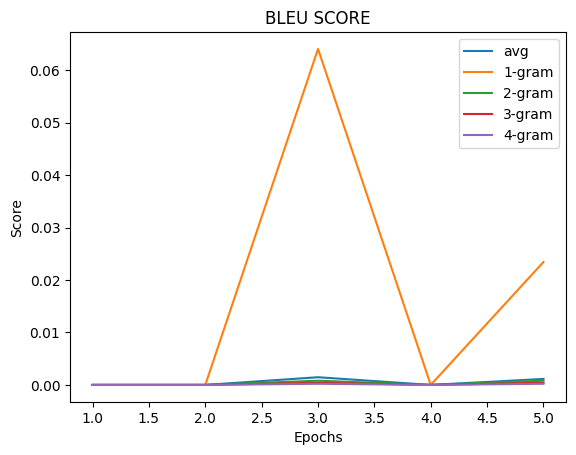

In [50]:
# 訓練模型
for epoch in range(num_epochs):
    train_losses = []
    test_losses = []
    bleu_scores = []

    start_time = time.time()
    train_loss = train(path='{}/MODELS/translation_model({}).pth'.format(dir_name,model_name))
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    #break
    print(f'Epoch {epoch+1:02} | Train Time: {epoch_mins}m {epoch_secs}s')

    start_time = time.time()
    test_loss = evaluate()

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Epoch {epoch+1:02} | Test Time: {epoch_mins}m {epoch_secs}s')

    start_time = time.time()
    samples = get_samples(TEST_ZSENT,TEST_KSENT,num=2000)
    test_score = sacrebleu_score(model, source_sentences=samples['zh'],target_sentences=samples['ko'])
    #test_score = sacrebleu_score(model, source_sentences=TEST_ZSENT,target_sentences=TEST_KSENT,bpmf_sentences=TEST_ZYSENT)
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Epoch {epoch+1:02} | Eval Time: {epoch_mins}m {epoch_secs}s')

    wandb.log({"Train_loss": train_loss, "Test_loss": test_loss})
    wandb.log({'BLEU_score(avg)':test_score['avg'],'1-gram':test_score['1-gram'],'2-gram':test_score['2-gram'],'3-gram':test_score['3-gram'],'4-gram':test_score['4-gram']})

    # 儲存訓練好的模型
    if(test_score['avg'] > best_score or test_loss < best_loss):
    #if(test_loss < best_loss):
      best_score = test_score['avg']
      best_loss = test_loss
      torch.save(model.state_dict(), '{}/MODELS/best_translation_model({}).pth'.format(dir_name,model_name))
      print('== save model ==')
    print('\tTrain Loss: {:.3f} | Test Loss: {:.3f}'.format(train_loss, test_loss))
    print('\tBLEU Score:')
    for k in test_score.keys():
        print('\t\t{}: {:.3f}'.format(k,test_score[k]))


    if(test_score['avg'] < 0.1 or best_score - test_score['avg'] > 5):
      try:
        model.load_state_dict(torch.load('{}/MODELS/best_translation_model({}).pth'.format(dir_name,model_name)))
        print('==load best model==')
      except:
        model = TranslationModel(my_model).to(device)
        #'nothing'


    train_losses.append(train_loss)
    test_losses.append(test_loss)
    bleu_scores.append(test_score)

    loss_history(train_losses, test_losses, path=model_name, to_show=False)
    sacrebleu_history(bleu_scores, path=model_name, to_show=False)
wandb.finish()

In [ ]:
bleu_score(test_source_sentences,model,tokenizer,max_length,device)

In [ ]:
from sacrebleu.metrics import BLEU

def sacrebleu_score(source_sentences,target_sentences,lang='ko'):
  global zh_tokenizer, ko_tokenizer, model, max_length, device
  model.eval()
  bleu = BLEU()
  bleu.trg_lang = lang
  avg_score = {'avg':0,'1-gram':0,'2-gram':0,'3-gram':0,'4-gram':0}

  # 生成目標語句
  generated_sentences = []
  with tqdm(total = len(source_sentences)) as pbar:
    for i in range(len(source_sentences)):
        source_sentence = source_sentences[i]
        target_sentence = target_sentences[i]
        source_tokens = zh_tokenizer(source_sentence, padding=True, truncation=True, return_tensors='pt', max_length=max_length).to(device)
        with torch.no_grad():
            output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
        generated_sentence = ko_tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
        gen_sent = ''
        for sent in generated_sentence:
            gen_sent += sent
        bleu_score = bleu.corpus_score([gen_sent],[[target_sentence]])
        #print([gen_sent],[[target_sentence]])
        #print(bleu_score)
        avg_score['avg'] += bleu_score.score
        avg_score['1-gram'] += bleu_score.precisions[0]
        avg_score['2-gram'] += bleu_score.precisions[1]
        avg_score['3-gram'] += bleu_score.precisions[2]
        avg_score['4-gram'] += bleu_score.precisions[3]
        pbar.update(1)
  avg_score['avg'] /= len(source_sentences)
  avg_score['1-gram'] /= len(source_sentences)
  avg_score['2-gram'] /= len(source_sentences)
  avg_score['3-gram'] /= len(source_sentences)
  avg_score['4-gram'] /= len(source_sentences)

  #print('gen:',generated_sentences,'tar:',[[sent] for sent in target_sentences],'sor',source_sentences)
  #print('BLEU Score:',bleu.score)

  return avg_score

In [ ]:
train_score = sacrebleu_score(TRAIN_ZSENT,TRAIN_KSENT)
test_score = sacrebleu_score(TEST_ZSENT,TEST_KSENT)
print('Train:',train_score)
print('Test:',test_score)